<a href="https://colab.research.google.com/github/PauloLucena2022/Atividade-01---LLM-e-Estat-stica/blob/main/Colab%20Notebook/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1: Z-score e Binomial Distribution Sample distribution and Sampling Distribution TLC p-value



## Parte 1: Z-Score e Binomial Distribution

**Introdução:**

* **Histogramas:**

Um histograma é uma forma de visualizar como os dados estão distribuídos, especialmente quando se que saber a frequência com que certos valores aparecem dentro de um conjunto numérico.

Ele funciona dividindo os dados em intervalos chamados bins e contando quantas observações caem em cada intervalo. Cada bin vira uma barra: quanto maior a barra, maior a quantidade de valores naquele pedaço da escala. Isso permite visualizar onde os dados se concentram, se estão espalhados, se há assimetria ou valores atípicos.

Ao invés de olhar apenas para as médias e desvios padrão, o histograma mostra o "formato" real dos dados, revelando padrões importantes para análises estatísticas.

A imagem abaixo mostra como cada bolinha verde representa uma observação do conjunto de dados - nesse caso, a altura das pessoas -. O eixo horizontal vai de Short (mais baixo) até Tall (mais alto), e cada agrupamento de bolinhas indica quantas pessoas caem naquele intervalo específico de altura. Assim, quanto mais bolinhas empilhadas em uma posição, maior a frequência daquela faixa.

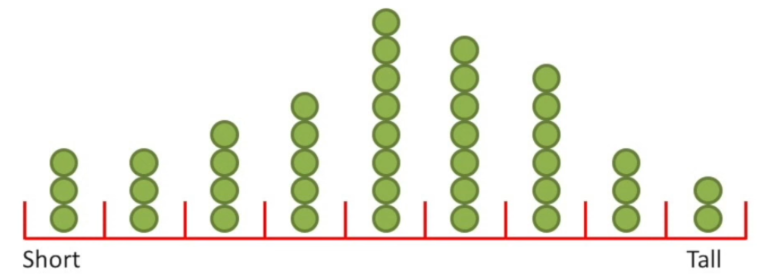

* **Z-score:**

O z-score é uma padronização que transforma qualquer valor x em uma medida relativa a sua distribuição original. Ele responde quantos desvios-padrão o valor está distante da média. Isso é importante, pois permite comparar variáveis que originalmente tem unidades diferentes. Abaixo está a fórmula utilizada:

$$
z = \frac{x - \mu}{\sigma}
$$

Onde, x é o valor observado, mu é a média da distribuição e sigma é o desvio padrão da distribuição.

Em uma distribuição normal, pode-se entender que:

** 68% dos valores estão entre [-1, 1];

** 95% dos valores estão entre [-2, 2];

** 99.7% dos valores estão entre [-3, 3].

Um z-score igual a 0 significa que o valor está exatamente na média; valores positivos indicam que está acima, e negativos indicam que está abaixo. Quanto maior for o módulo do z-score, mais raro ou improvável aquele valor tende a ser dentro daquela distribuição.

Afim de conseguir captar as probabilidades, usa-se tabelas de conversão, como as mostradas abaixo:

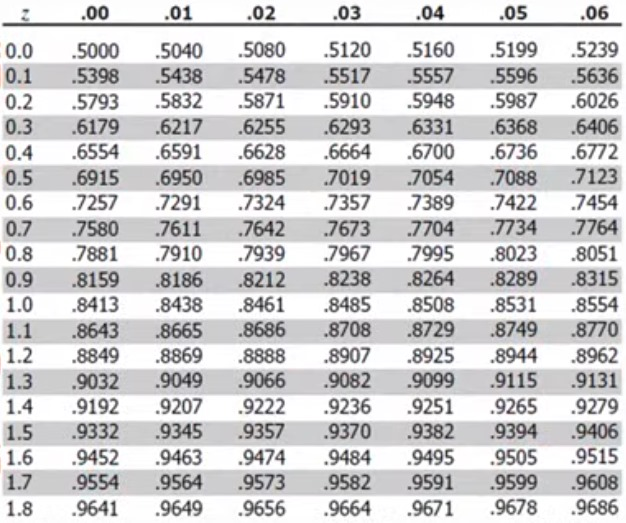

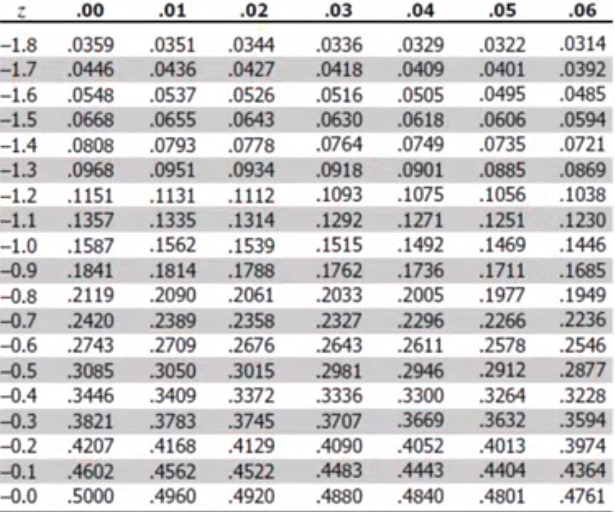

* **Distribuição Binomial:**

A distribuição binomial é responsável por modelos fenômenos onde cada evento tem apenas 2 resultados (sucesso ou fracasso), a probabilidade de sucesso é constante (representada por p), os experimentos são independentes e o número de tentativas é fixo (representado por n).

A probabilidade de observar k sucessos em n tentativas é representada pela fórmula abaixo:

$$
P(X = k) = \binom{n}{k} p^{k} (1 - p)^{\,n-k}
$$

em que o coeficiente binomial representa quantas formas existem de obter k sucessos em n tentativas:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

que representa o número de maneiras de escolher k sucessos em n tentativas.

A distribuição binomial permite comparar o que se espera com o que se observa, então pode ser usada para calcular se os resultados observados são prováveis, se são estranhos ou se são improváveis.

O exemplo abaixo mostra um cenário com 50 tentativas e probabilidade de sucesso de 0.95. Ele mostra que obter 48 acertos e 2 erros é um resultado esperado dentro desse contexto, já que a fórmula da binomial indica uma probabilidade de cerca de 0,26 para esse evento.

No gráfico é possível ver que a distribuição fica concentrada perto de 47 a 50 sucessos, destacando que 48 está justamente na faixa mais provável. Assim, a imagem demonstra como a binomial descreve a chance de observar certos resultados quando sabemos a taxa de sucesso de cada tentativa.

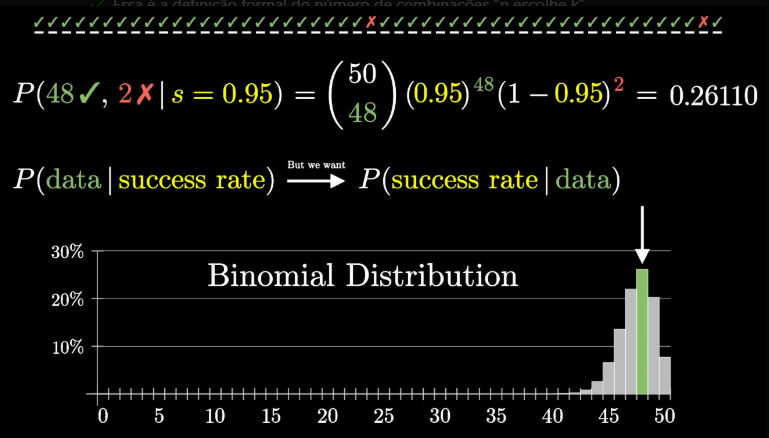

### Dataset escolhido: Occupancy Detection

#### O dataset pode ser localizado no repositório UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/357/occupancy+detection

#### Explicações sobre o dataset:

O dataset foi criado a partir de dados dados experimentais coletados em uma sala de escritório. A motivação por trás deste trabalho é a aplicação de técnicas de Machine Learning para a detecção de ocupação, um fator crucial para sistemas de automação predial, controle de climatização (HVAC) e eficiência energética.

A variável alvo é a "Occupancy", que é binária: 0 (Sala vazia) / 1 (Sala ocupada)

O dataset apresenta 6 features e 1 label, e 8143 registros:

* date: Carimbo de data e hora (ano-mês-dia hora:minuto:segundo)

* Temperature: Temperatura do ambiente (Celsius)

* Humidity: Umidade relativa do ar (Percentual)

* Light: Nível de luminosidade (Lux)

* CO2: Concentração de dióxido de carbono (Partes por milhão)

* Humidity Ratio: Razão de umidade (quantidade de vapor d'água por kg de ar seco) (kg de vapor d'água/kg de ar)

* Occupancy (label): Ocupação da sala

OBS: A variável Humidity Ratio é uma variável derivada, calculada a partir da temperatura e da umidade relativa, e é frequentemente utilizada em estudos de conforto térmico e qualidade do ar.

### Seção A: Histogramas

#### Comando:
* Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala.


In [37]:
# Importações e leitura do dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

occupancy = pd.read_csv('datatraining.txt')
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


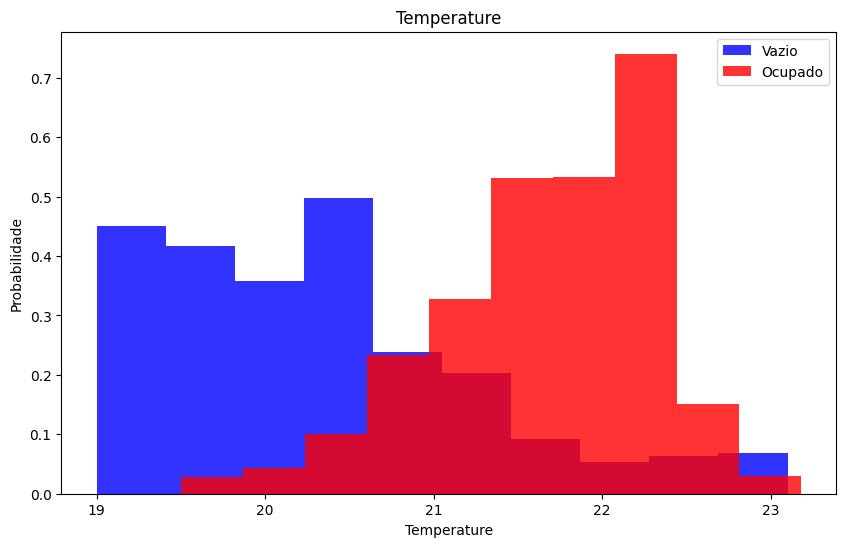

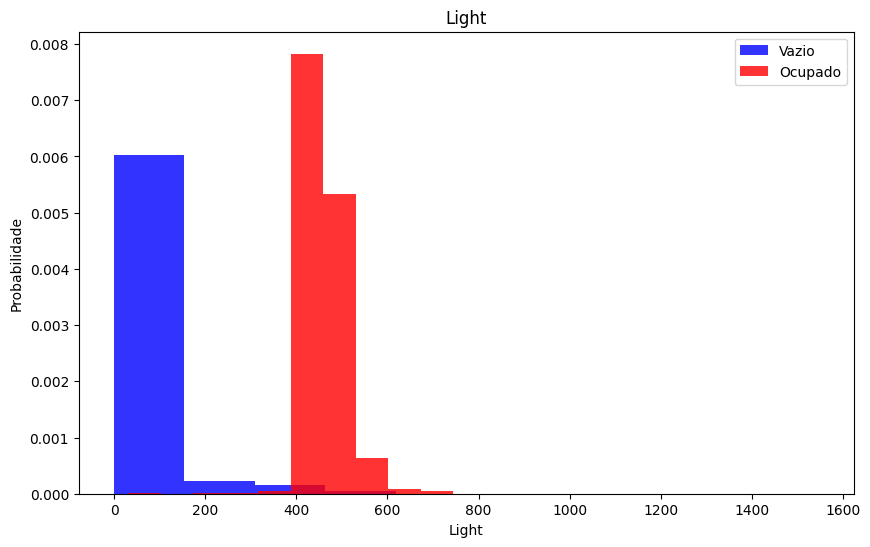

In [40]:
# Plot dos histogramas para: Temperatura, Humidade, Luz, CO2 e Razão de Humidade
classes_escolhidas_histograma = ['Temperature', 'Light']
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (10,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

* Faça dois conjuntos de histogramas com tamanhos de bins diferentes.


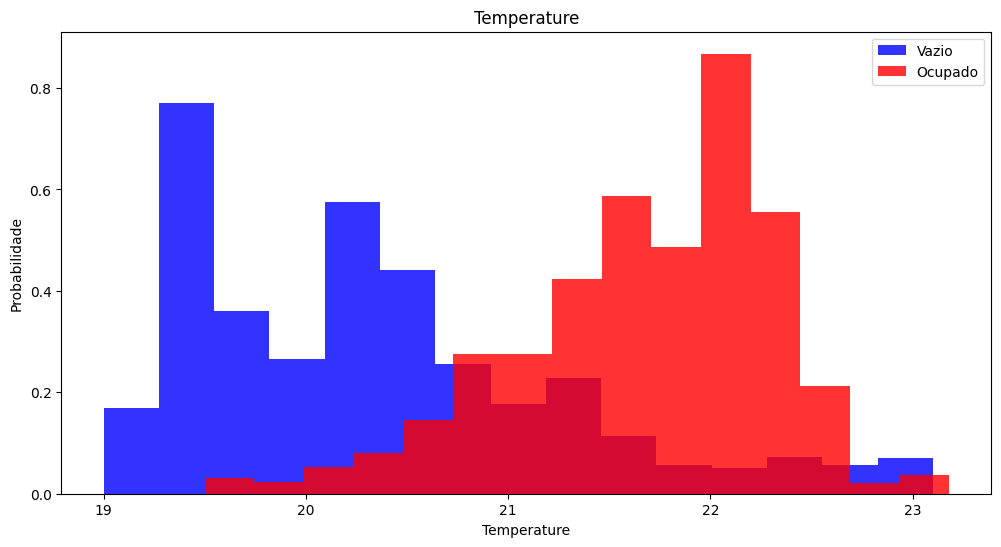

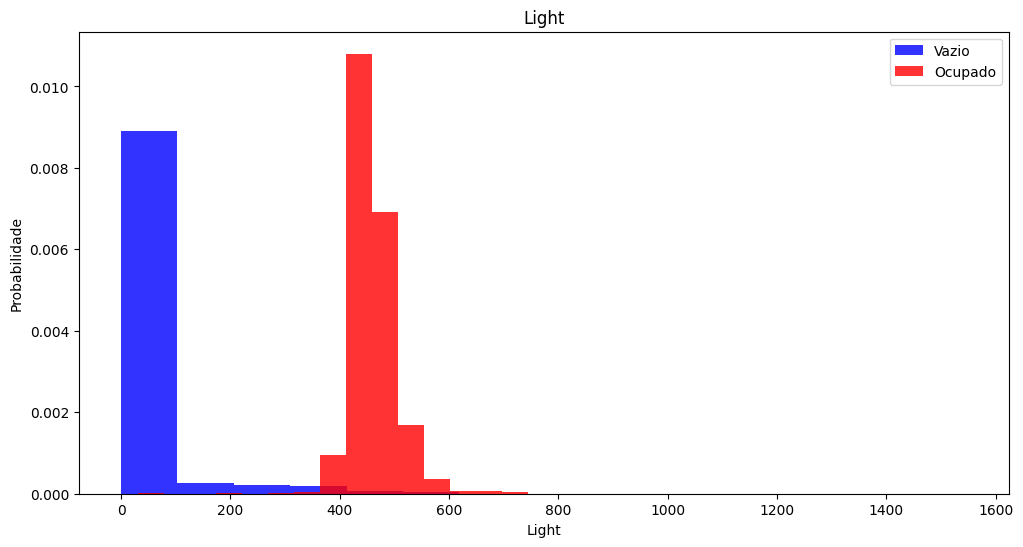

In [3]:
# Primeiro conjunto terá apenas 15 bins
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (12,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True, bins = 15)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True, bins = 15)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

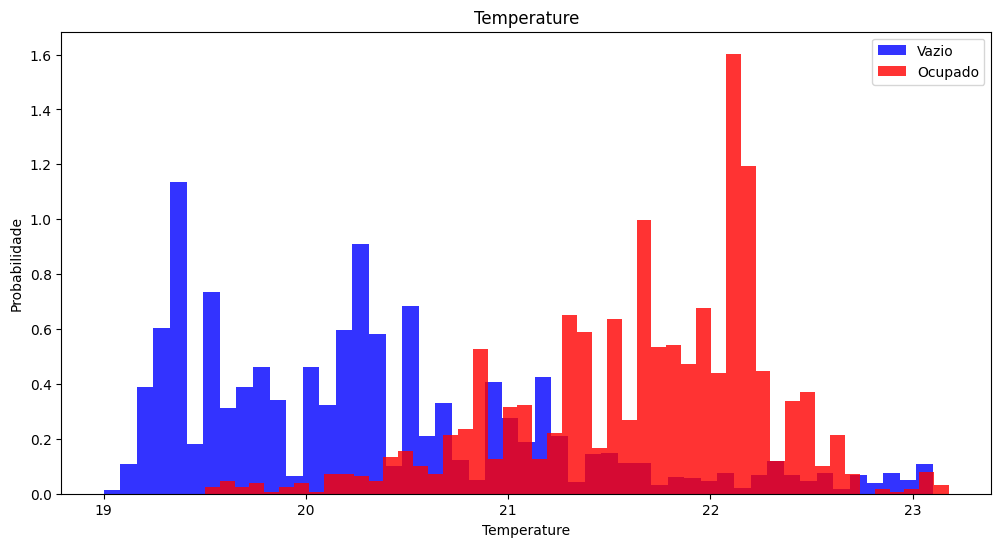

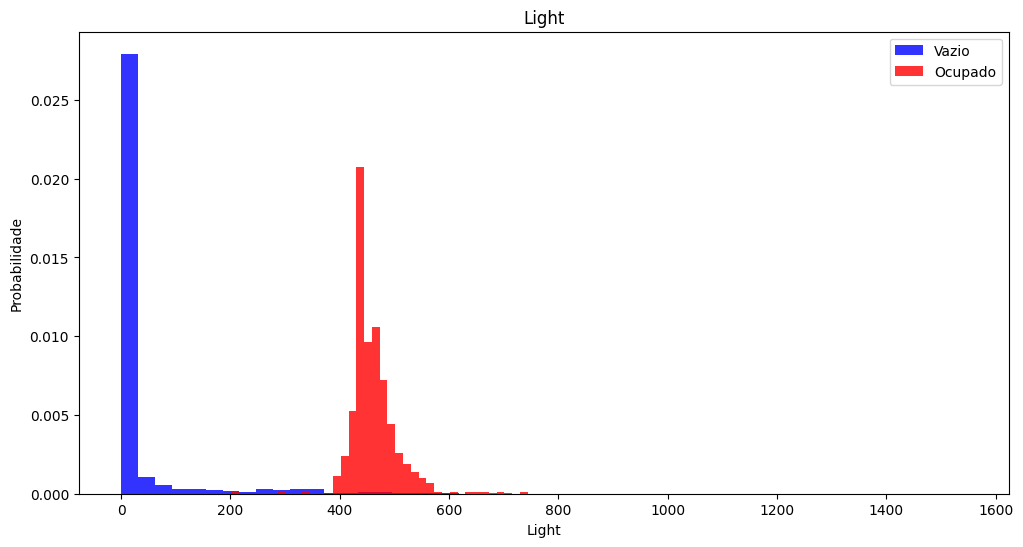

In [4]:
# Segundo conjunto terá 50 bins
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (12,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True, bins = 50)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True, bins = 50)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

* Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

** Análise Geral:

A análise desses histogramas é muito importante, pois ela permite avaliar o poder discriminativo de cada variável, ou seja, o quão bem um modelo de Machine Learning seria capaz de distinguir entre "Vazio" e "Ocupado" usando apenas aquela feature.

Para a feature "Temperature", o histograma confirma uma separabilidade moderada. A classe "vazio" está concentrada em temperaturas mais baixas (aproximadamente 19°C a 20.5°C), o que representa a temperatura ambiente do sistema de climatização. A classe "Ocupado" está deslocada para temperaturas mais altas (aproximadamente 20.5°C a 23°C), que é esperado devido ao calor corporal e dos equipamentos eletrônicos. No entanto, há um ponto interessante em que ocorre uma sobreposição que fica em uma faixa intermediária (aproximadamente 20.5°C a 21.5°C), ou seja, nessa região a temperatura se torna ambígua, e em machine learning, um classificador que dependa apenas dela terá uma precisão limitada.

Para a feature "Light", o histograma demonstra uma alta separabilidade entre as classes. A classe "Vazio" está concentrada em valores muito baixos de luminosidade (próximos de 0 a 100 Lux), o que indica que as luzes estavam desligadas ou havia pouca luz natural na maioria dos momentos não ocupados. A classe "Ocupado" está concentrada em valores significativamente mais altos (aproximadamente 400 a 600 Lux), o que é um forte indicativo de que as luzes artificiais foram acesas durante a ocupação. A sobreposição entre as distribuições é mínima, o que significa que a feature "Light" é um excelente preditor univariado. Em machine learning, um classificador que dependa apenas desta variável alcançaria uma alta precisão, pois a fronteira de decisão entre as classes é muito clara.

** Comparação entre 15 bins e 50 bins:

Em relação à diferença dos bins, a diferença está na granularidade da visualização.

O histograma com 15 bins garante uma visão mais suavizada da distribuição, sendo muito bom para identificar a forma geral, como a bimodalidade na Temperature e a alta separabilidade na Light. Essa suavização ajuda a focar nas tendências principais e a ignorar mudanças menores, sendo útil para uma análise inicial e para definir limiares amplos. Essa visão mais ampla com apenas 15 bins nos garante, principalmente, duas ideias: Salas Vazias tendem a ter temperatura mais baixa e pouca luminosidade, enquanto Salas Ocupadas tendem a ter temperaturas mais elevadas e alta luminosidade.

Em contrapartida, o histograma com 50 bins oferece uma visão mais detalhada, revelando picos mais finos na distribuição. Apesar de introduzir mais "ruído" visual, esse detalhe é muito importante para Machine Learning. Nesse cenário, é possível ver a estrutura real das distribuições, o que mostra que a temperatura, isoladamente, não é uma variável capaz de separar perfeitamente o estado do ambiente, o que determina que modelos mais simples podem ter dificuldade em discriminar as classes usando apenas essa feature. Porém, no histograma de Light, percebe-se que a diferença entre as classes é tão grande que um tamanho de bins menor não oculta tantas informações, mas um tamanho maior de bins consegue determinar com mais precisão o momento de transição entre as classes.

### Seção B: z-score

Variável escolhida: Temperature (Temperatura)

Inicialmente, a média (mu) e o desvio-padrão (sigma) da variável Temperature original foram calculados e utilizados como parâmetros para gerar 500 pontos de dados artificiais, seguindo uma Distribuição Normal. Foi plotado um histograma com a curva da distribuição ajustada.

Em seguida, o processo de padronização (z-score) foi aplicado aos dados. Essa padronização permite que as probabilidades de qualquer valor de temperatura sejam calculadas diretamente através da Função de Distribuição Cumulativa (CDF) da distribuição.

A partir da distribuição padronizada, foram calculadas três probabilidades relevantes para o contexto de detecção de ocupação:

1) P(X > 22): determinou a probabilidade de a temperatura ser superior a 22°C. Após a padronização, o Z-score correspondente (aproximadamente 1.32) foi utilizado para determinar a área à direita da curva, indicando a probabilidade de ocorrência de temperaturas elevadas, que estão fortemente associadas ao estado "Ocupado".

2) P(19 < X < 23): determinou a probabilidade de a temperatura estar na faixa de 19°C a 23°C. Ao padronizar os limites e subtrair as áreas da CDF, verificou-se que esta faixa abrange a maior parte das medições, representando o intervalo normal de operação da sala(z-score de aproximadamente 0.92).

3) P(X < 19.5): determinou a probabilidade de a temperatura ser inferior a 19.5°C. O Z-score negativo resultante (aproximadamente -1.08) foi usado para encontrar a área à esquerda da curva, indicando a probabilidade de temperaturas mais baixas, ou seja, associdas ao estado "Vazio".


Comando: Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados.

In [5]:
# Variável escolhida: Temperatura
temperatura = occupancy['Temperature']
temperatura.head()

,Temperature
1,23.18
2,23.15
3,23.15
4,23.15
5,23.10


In [6]:
temperatura.describe()

,Temperature
count,8143.000000
mean,20.619084
std,1.016916
min,19.000000
25%,19.700000
50%,20.390000
75%,21.390000
max,23.180000


In [7]:
# Dados artificiais ("coletados") estarão entre 19(min) e 23.18(max)
media = temperatura.mean()
desvio_padrao = temperatura.std()

np.random.seed(3)
temperaturas_artificiais = np.random.normal(media, desvio_padrao, 500)
temperaturas_artificiais[:10]

array([22.43796934, 21.06297768, 20.7172135 , 18.72406727, 20.33700302,
       20.2583234 , 20.53494247, 19.98147634, 20.57452422, 20.13379278])

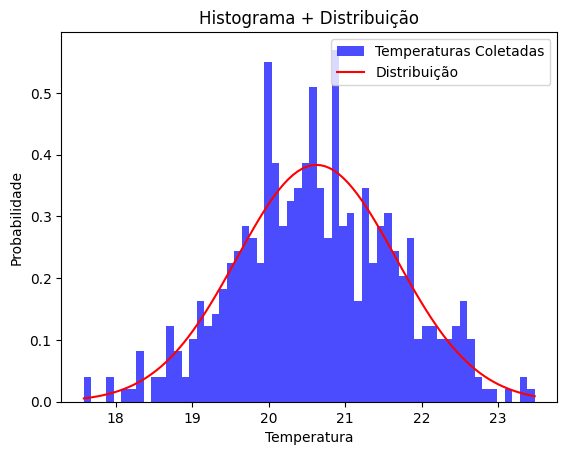

In [8]:
# Histograma + Distribuição dos Dados Coletados
media, desvio_padrao = norm.fit(temperaturas_artificiais)

x = np.linspace(min(temperaturas_artificiais), max(temperaturas_artificiais), 100)
y = norm.pdf(x, media, desvio_padrao)

plt.hist(temperaturas_artificiais, color = 'blue', label = 'Temperaturas Coletadas', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x, y, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma + Distribuição')
plt.legend()

* Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.


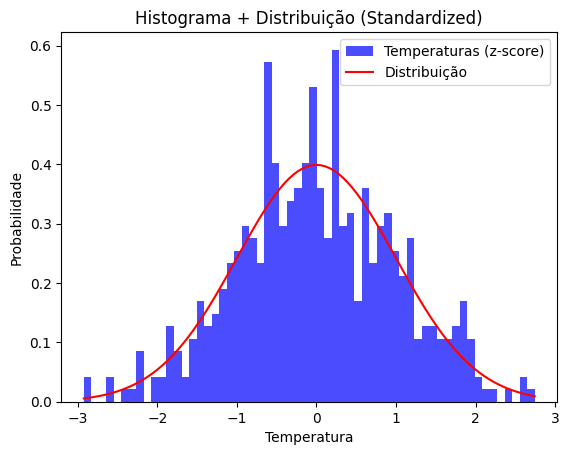

In [9]:
# versão standardized
z = (temperaturas_artificiais - media) / desvio_padrao

x_z_score = np.linspace(min(z), max(z), 100)
y_z_score = norm.pdf(x_z_score, 0, 1)

plt.hist(z, color = 'blue', label = 'Temperaturas (z-score)', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x_z_score, y_z_score, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma + Distribuição (Standardized)')
plt.legend()

Qual a probabilidade de a temperatura ser maior que 22 graus?

In [10]:
# P(X > 22)

z_exemplo1 = (22 - media) / desvio_padrao
print(f'z: {z_exemplo1:.2f}')

# P(z > 1.32)
prob_exemplo1 = 1 - norm.cdf(z_exemplo1)
print(f'Probabilidade de a temperatura ser maior que 22 graus: {prob_exemplo1 * 100:.2f}%')

z: 1.32
Probabilidade de a temperatura ser maior que 22 graus: 9.31%


Qual a probabilidade de a temperatura estar entre 19 e 20 graus?

In [11]:
# P(19 < X < 23)

z_exemplo2_19 = (19 - media) / desvio_padrao
print(f'z para 19: {z_exemplo2_19:.2f}')

z_exemplo2_23 = (23 - media) / desvio_padrao
print(f'z para 23: {z_exemplo2_23:.2f}')

# P(-1.56 < z < 2.28)
prob_exemplo2_19 = norm.cdf(z_exemplo2_19)
prob_exemplo2_23 = norm.cdf(z_exemplo2_23)
prob_exemplo2_total = prob_exemplo2_23 - prob_exemplo2_19

print(f'Probabilidade de a temperatura : {prob_exemplo2_total * 100:.2f}%')

z para 19: -1.56
z para 23: 2.28
Probabilidade de a temperatura : 92.97%


Qual a probabilidade de a temperatura ser menor que 19.5 graus?

In [12]:
# P(X < 19.5)

z_exemplo3 = (19.5 - media) / desvio_padrao
print(f'z: {z_exemplo3:.2f}')

# P(z < -1.08)
prob_exemplo3 = norm.cdf(z_exemplo3)
print(f'Probabilidade de a temperatura ser menor que 19.5 graus: {prob_exemplo3 * 100:.2f}%')

z: -1.08
Probabilidade de a temperatura ser menor que 19.5 graus: 13.97%


### Seção C: Distribuição Binomial
Comando:
 * Para s = 0.80, reproduza a mesma simulação do slide anterior.
 * Faça o cálculo explicitamente, usando a equação.

Imagem do slide anterior:

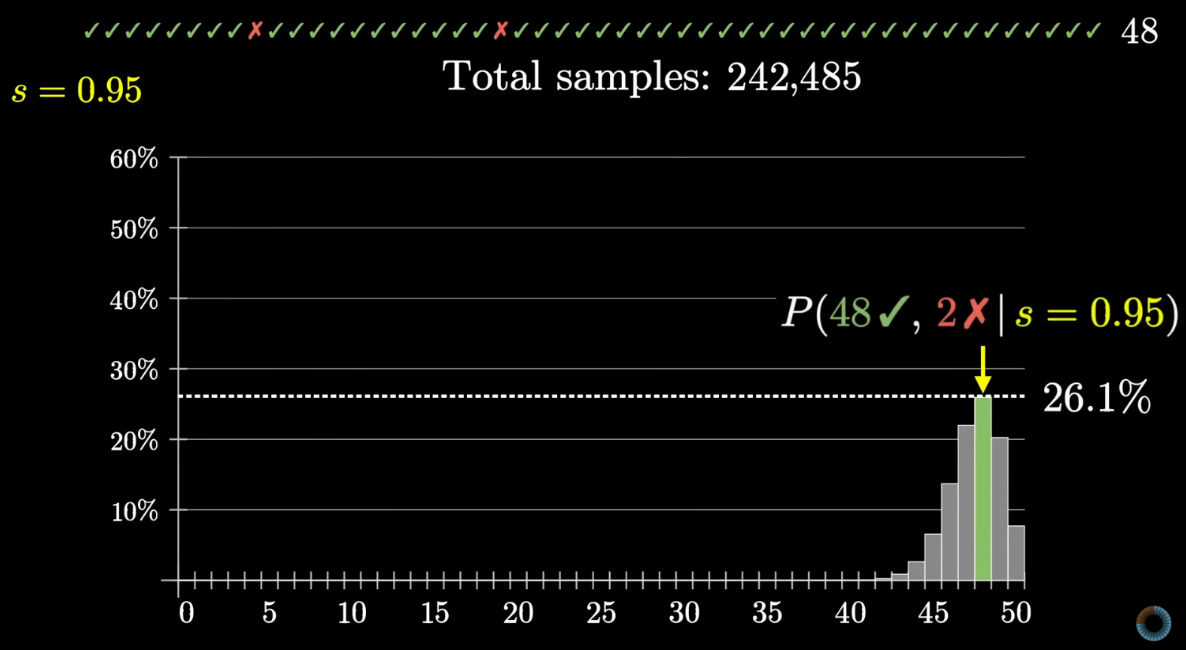

Probabilidade de 48 avaliações positivas: 0.11%


<Figure size 640x480 with 0 Axes>

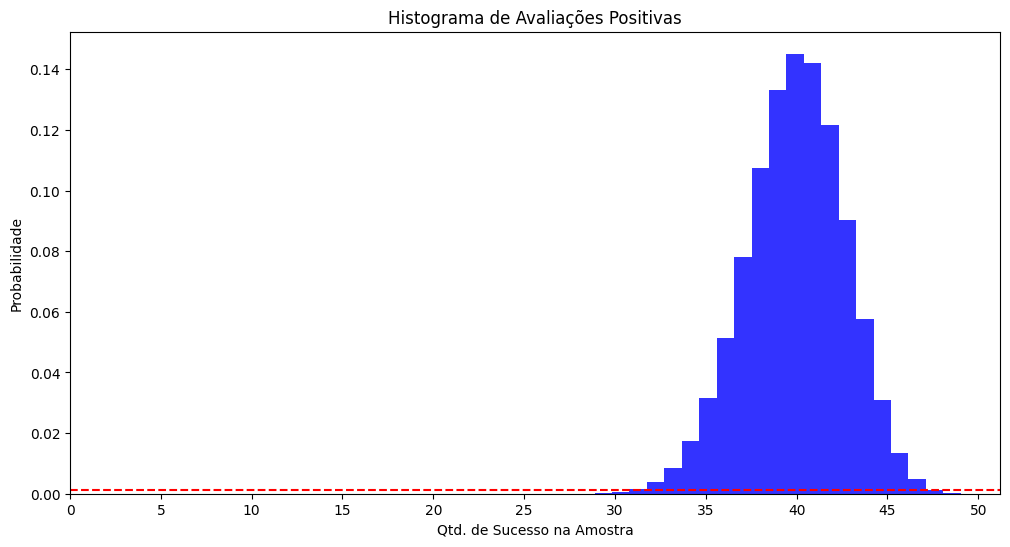

<Figure size 640x480 with 0 Axes>

In [41]:
from math import comb

# Variáveis pra botar na fórmula
n = 50
x = 48
p = 0.8
q = 1 - p

# Amostra
np.random.seed(10)
amostra = np.random.binomial(n, p, size = 242485) # avaliações positivas

# Binomial Probability
P_x = comb(n,x) * (p ** x) * (q ** (n - x))
print(f'Probabilidade de 48 avaliações positivas: {P_x * 100:.2f}%')

# Histograma
plt.figure(figsize = (12,6))
plt.hist(amostra, bins = 25, density = True, color = 'blue', alpha = 0.8)
plt.axhline(y = P_x, color = 'red', linestyle = '--')
plt.xticks(range(0, 51, 5))

plt.title('Histograma de Avaliações Positivas')
plt.xlabel('Qtd. de Sucesso na Amostra')
plt.ylabel('Probabilidade')

plt.figure()

* Compare os resultados

No cenário de referência, ou seja, com p = 0.95, a probabilidade teórica de se obter 48 sucessos, é de aproximadamente 26,11%. A distribuição dos resultados mostrou-se concentrada em torno da média teórica de 47,5 sucessos (50 * 0.95). Ao reduzir a probabilidade para 0.8, observa-se uma alteração considerável no comportamento da distribuição. O cálculo da probabilidade de obter 48 sucessos neste novo cenário revela um valor de apenas 0,11%, indicando que é um evento extremamente raro. A média dessa distribuição deslocou-se para 40 sucessos (50 * 0.8). Comparativamente, a probabilidade de obter 48 sucessos no cenário com p=0.80 é cerca de 240 vezes menor do que no cenário com p=0.95.

Analisando exclusivamente os histogramas é possível perceber essas mudanças. A distribuição para p=0.80 é visivelmente mais larga e centrada em 40, enquanto a distribuição para p=0.95 é mais alta, estreita e concentrada em torno de 48.

Logo, demonstra-se alta sensibilidade ao parâmetro da probabilidade de sucesso. Uma redução de 15% neste parâmetro (de 0.95 para 0.80) foi suficiente para deslocar o centro da distribuição, aumentar sua dispersão e transformar um resultado em um evento de extrema raridade.

* Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

A análise da evolução das dez primeiras amostras demonstrou que os resultados iniciais se agruparam em torno da média (40), com valores variando de aproximadamente 38 para 45, reforçando visualmente a baixa probabilidade de se observar um valor como 48 (até então, para 10 amostras a frequência relativa de se obter 48 sucessos foi zero).


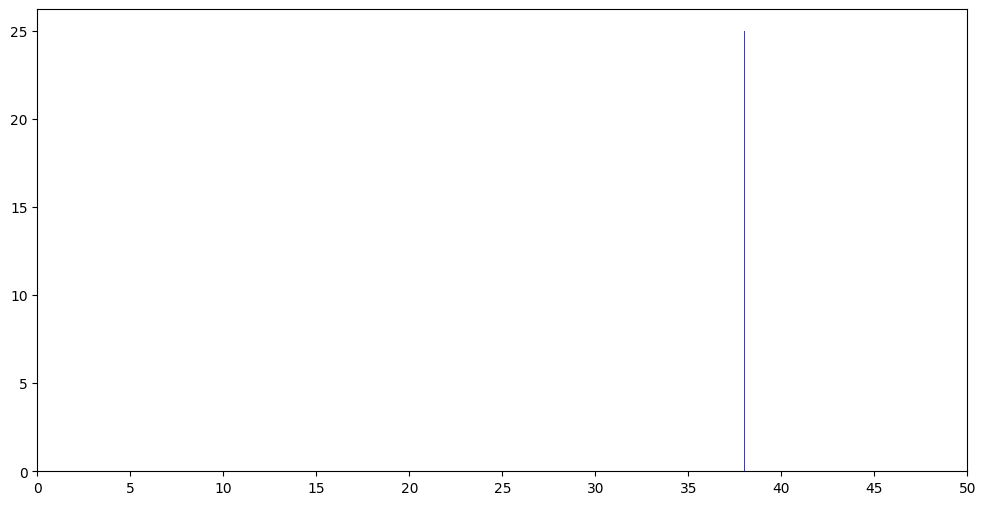

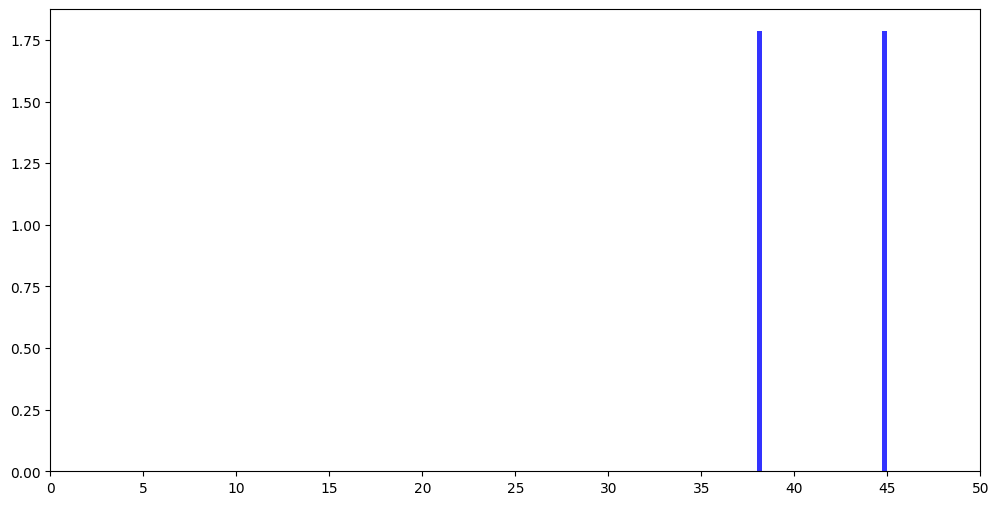

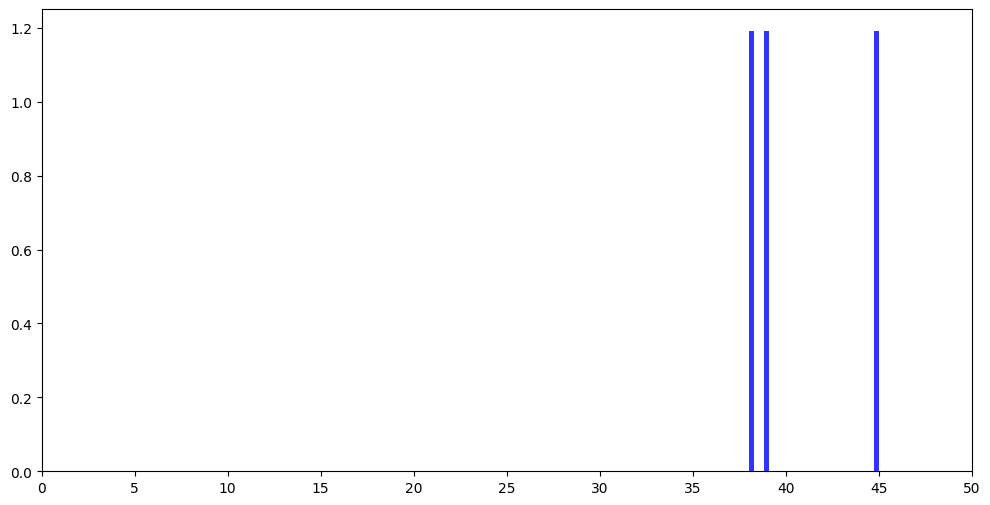

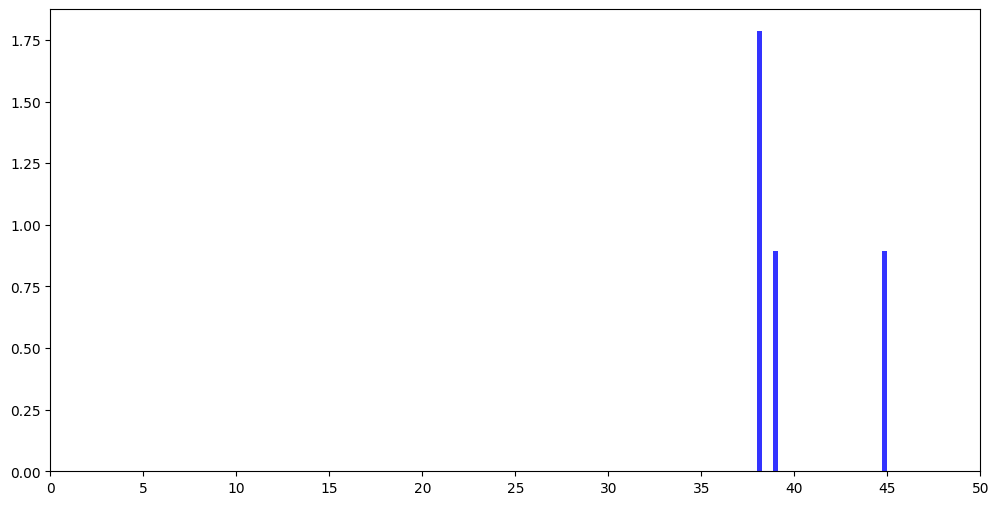

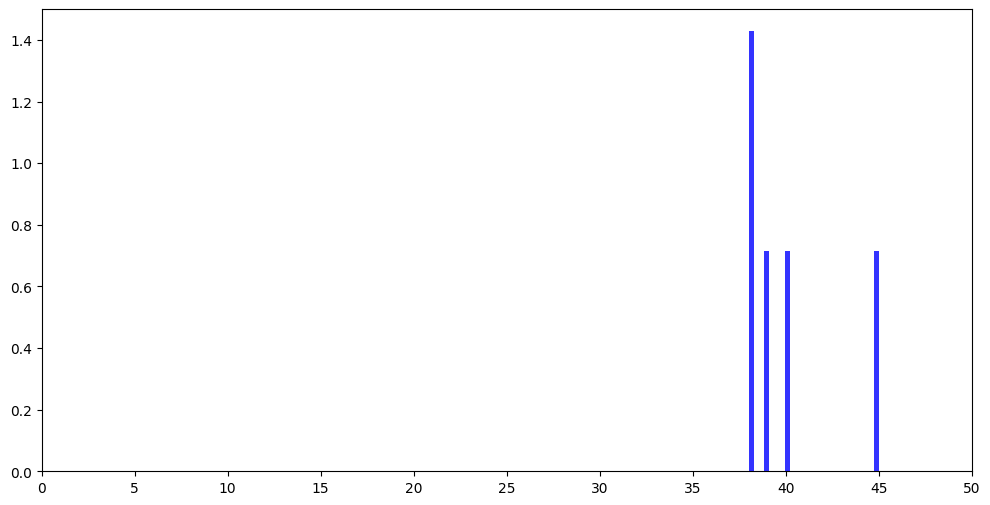

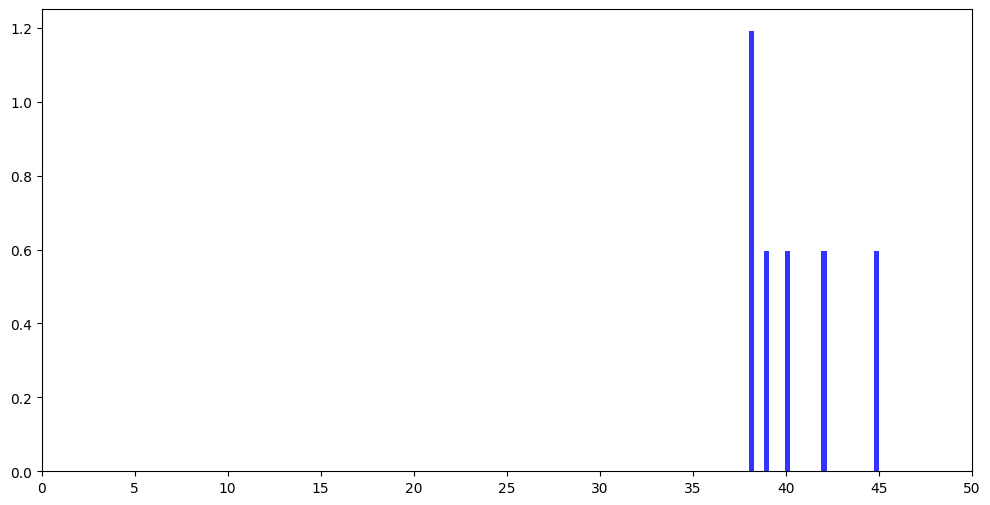

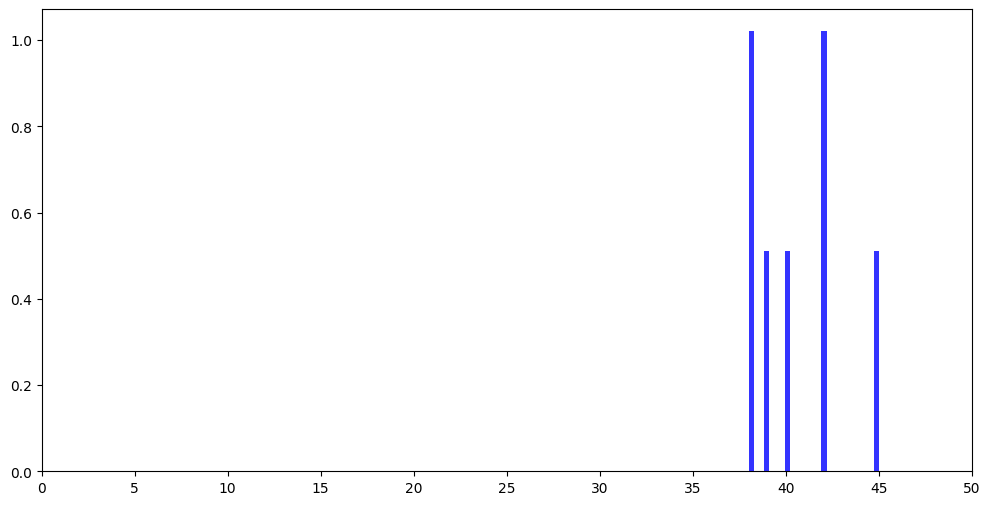

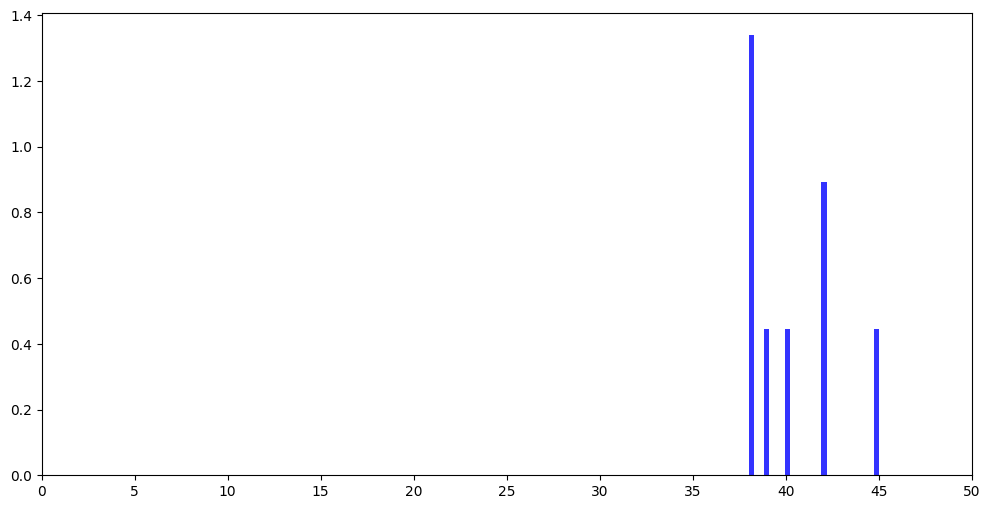

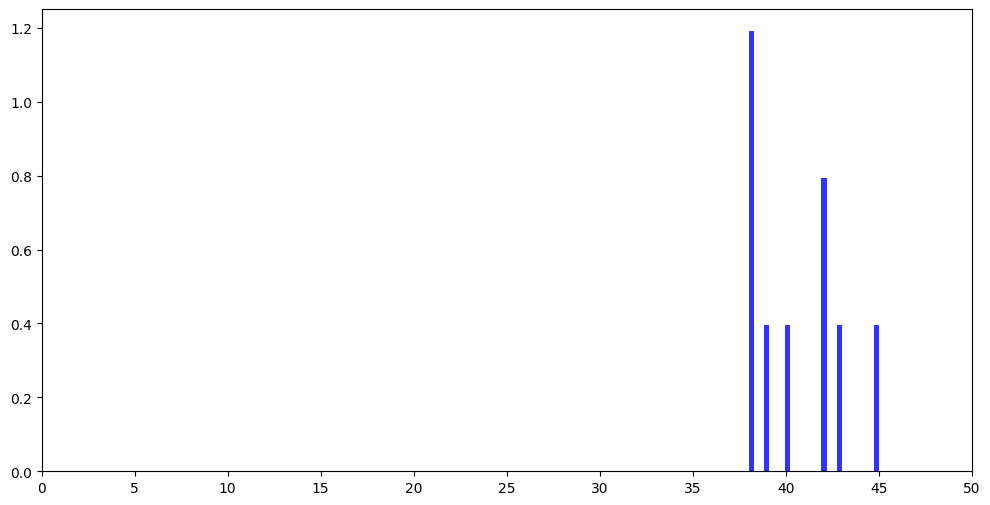

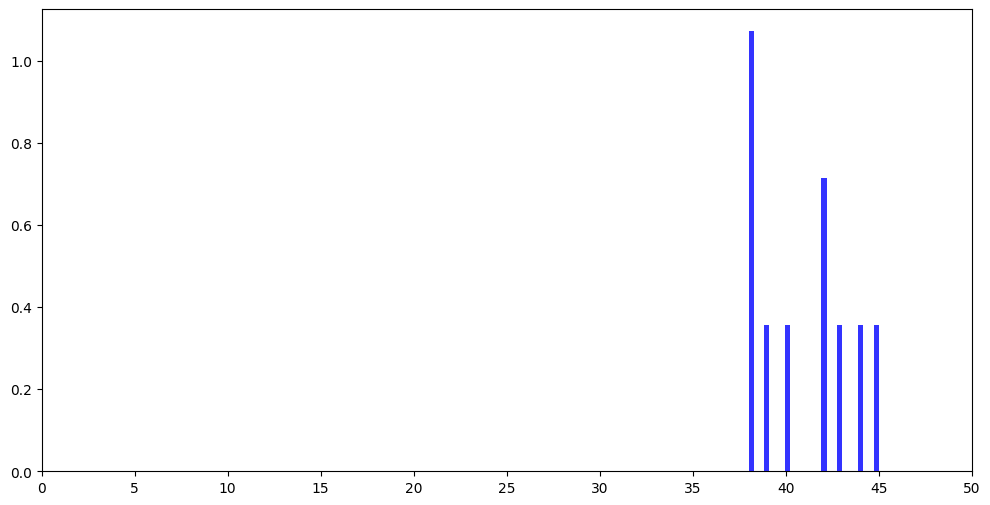

In [14]:
# Histogramas para as 10 primeiras amostras
amostra_10 = amostra[:10]
lista_amostra = []

for i in amostra_10:
  lista_amostra.append(i)

  plt.figure(figsize = (12,6))
  plt.hist(lista_amostra, bins = 25, density = True, color = 'blue', alpha = 0.8)
  plt.xticks(range(0, 51, 5))

## Parte 2: Sample distribution and sampling distribution TLC p-value

**Introdução:**

* **Sample Distribution:**

Sample Distribution é a distribuição dos valores observados em uma amostra coletada de uma população. Logo, esses dados representam apenas os dados da amostra coletada, não da população inteira, por isso pode ter flutuações, irregularidades e características que não são exatamente iguais às da população real.

O exemplo abaixo mostra uma população de pessoas em que se está coletando uma sample e coletando apenas a média dessa amostra.

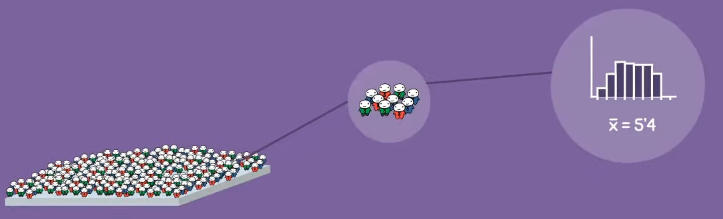

* **Sampling Distribution:**

Sampling Distribution não é a distribuição dos dados, mas sim a distribuição de uma estatística calculada sobre várias samples diferentes. Ela permite quantificar incerteza: quanto menor a variabilidade das estatístocas, mais confiável é a estimativa.

No exemplo abaixo, há uma população e está-se captando algumas amostras, a partir dessas amostras podem ser feitos diversos cálculos, como da média, em cada uma delas para verificar seu nível de variabilidade.



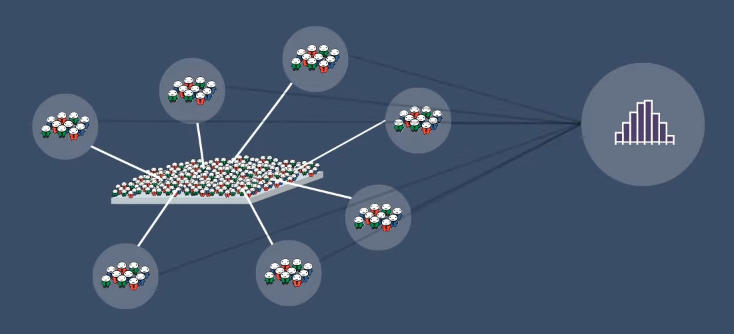

* **TLC (Teorema do Limite Central):**

O Teorema do Limite Central afirma que independentemente da forma da distribuição original dos dados, a distribuição das médias amostrais tende a se aproximar de uma Normal conforme o número de amostras aumenta. Independentemente da forma da distribuição original dos dados, a distribuição das médias amostrais tende a se aproximar de uma Distribuição Normal conforme o número de amostras aumenta.

Implica-se também que a média da sampling distribution é igual à média verdadeira da população, e o desvio-padrão dessa distribuição (o erro padrão) diminui à medida que aumentamos o tamanho da amostra.

O exemplo abaixo demonstra que, após 40 médias, uma distribuição exponencial já começa a se formar como uma Distribuição Gaussiana, e quanto mais esse número de médias aumenta, mais próximo de uma Gaussiana está.

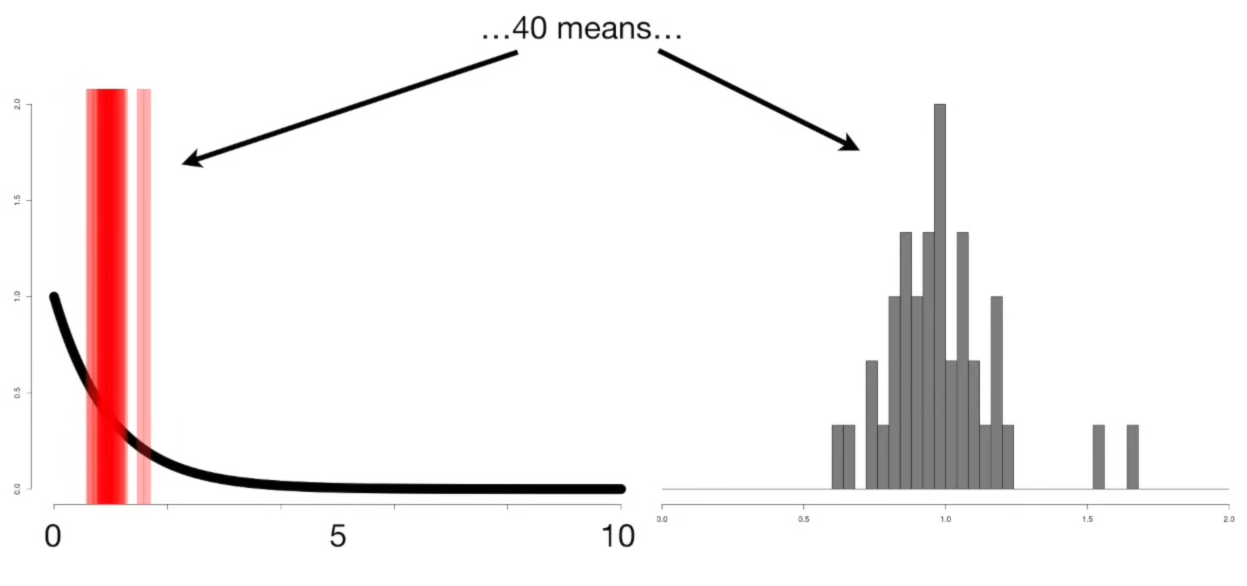

* **p-value:**

O p-value, é uma medida estatística utilizada para avaliar a evidência contra a hipótese nula (H₀) em um teste de significância. Ele representa a probabilidade de observar um resultado tão extremo quanto — ou mais extremo do que — aquele obtido na amostra, assumindo que a hipótese nula é verdadeira. Em outras palavras, o p-value quantifica o quão compatíveis os dados estão com a hipótese nula.

Ao realizar um teste estatístico, parte-se do pressuposto de que a hipótese nula é verdadeira. O p-value, então, calcula a chance de obter, apenas por acaso, valores semelhantes ou mais extremos do que os observados. Quanto menor o p-value, menor é a compatibilidade dos dados com a hipótese nula, indicando maior evidência para rejeitá-la.

Utiliza-se um nível de significância predefinido, o mais comum é de 0.05, ou 5%. Se o p-value for menor que 0.05, rejeita-se a Hipótese Nula e conclui-se que há evidências estatisticamente significativas para a hipótese alternativa. Caso contrário, não rejeitamos a Hipótese Nula — o que não significa provar que ela é verdadeira, apenas que os dados não fornecem evidência suficiente contra ela.

A fórmula abaixo indica o cálculo de probabilidade utilizando p-value two-sided, o mais utilizado e confiável (a probabilidade de observar um valor tão extremo ou mais extremo do que o obtido na amostra, em qualquer uma das duas direções, assumindo que a hipótese nula é verdadeira.)

$$
p\text{-value} = P\!\left( |X-\mu| \ge |x_{\mathrm{obs}}-\mu| \mid H_0 \right)
$$

### Seção A: Sample Distribution and Sampling Distribution

Para simular o experimento foram criados 200.000 valores de temperatura a partir de uma distribuição normal com média e desvio-padrão definidos anteriormente, que será a população artificial.

Em seguida foi retirada uma amostra aleatória de tamanho 100 da população.
No gráfico desse passo há o histograma dos 100 valores e a curva de densidade normal estimada pela média e desvio-padrão calculados dessa amostra. Por ser uma amostra de tamanho moderado (n = 100) retirada de uma população normal, o histograma tende a ser uma gaussiana mesmo.

Para estudar a variabilidade das estimativas de média, repetiu-se o procedimento 1000 vezes: retirou-se 1000 amostras independentes de tamanho 100 (sampling) e calculou-se a média de cada amostra.

Em seguida, foram calculadas três probabilidades. Os resultados mostram que valores extremos de média são pouco prováveis, enquanto valores próximos ao centro da distribuição são comuns. A probabilidade de uma amostra apresentar média acima de 21°C é baixa, indicando que esse é um evento raro. Por outro lado, a chance de a média ficar entre 20°C e 20,6°C é alta, pois esse intervalo está perto da região mais densa da distribuição amostral. Já a probabilidade de a média ser menor que 20,5°C representa a proporção das amostras que ficam abaixo desse ponto e também reflete o comportamento concentrado da distribuição.

Comando: A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution.

Média da População: 20.63
Desvio Padrão da População: 1.04


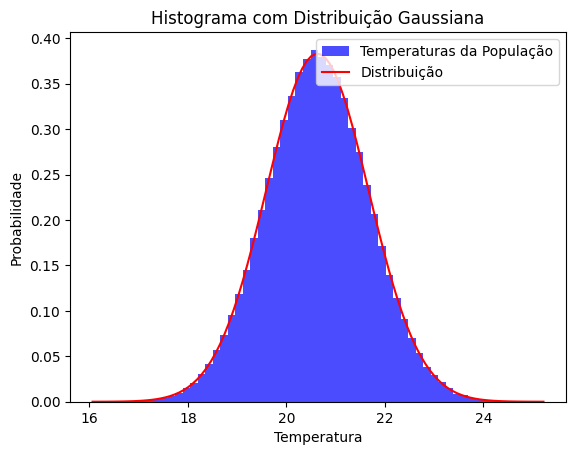

In [15]:
# Criando população artificial de Temperatura
# Obs: vou utilizar as mesmas variáveis media e desvio_padrao de anteriormente

np.random.seed(20)
populacao = np.random.normal(media, desvio_padrao, 200000)

media_populacao = np.mean(populacao)
desvio_padrao_populacao = np.std(populacao)

print(f'Média da População: {media_populacao:.2f}')
print(f'Desvio Padrão da População: {desvio_padrao_populacao:.2f}')

# Histograma com Distribuição Gaussiana

x = np.linspace(min(populacao), max(populacao), 100)
y = norm.pdf(x, media_populacao, desvio_padrao_populacao)

plt.hist(populacao, color = 'blue', label = 'Temperaturas da População', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x, y, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma com Distribuição Gaussiana')
plt.legend()

A Média desse sample é 20.50 e o Desvio Padrão é 1.02


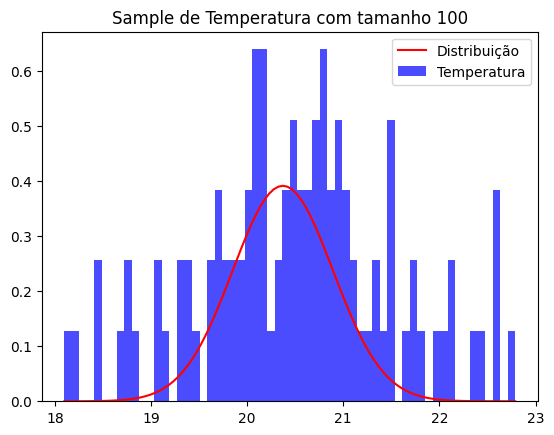

In [16]:
# Sample Distribution - 100 valores
np.random.seed(20)
sample = np.random.choice(populacao, size = 100)

media_sample = np.mean(sample)
desvio_padrao_sample = np.std(sample)

print(f'A Média desse sample é {media_sample:.2f} e o Desvio Padrão é {desvio_padrao_sample:.2f}')

x_sample = np.linspace(min(sample), max(sample), 100)
y_sample = norm.pdf(x, media_sample, desvio_padrao_sample)

plt.plot(x_sample, y_sample, label = 'Distribuição', color = 'red')

plt.hist(sample, color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.title('Sample de Temperatura com tamanho 100')
plt.legend()
plt.show()

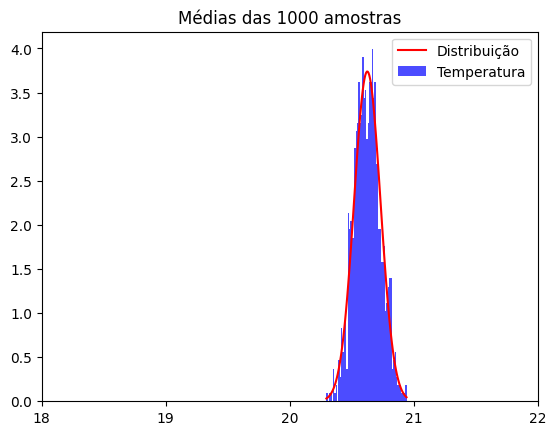

In [17]:
# Sampling Distribution - 1000 amostras de 100 valores cada
sampling = []
medias_sampling = [] # pegar todas as médias de cada amostra

np.random.seed(20)
for _ in range(1000):
  s = np.random.choice(populacao, size = 100)
  media_s = np.mean(s)

  medias_sampling.append(media_s)
  sampling.append(s)

media_das_medias_sampling = np.mean(medias_sampling)
desvio_padrao_das_medias_sampling = np.std(medias_sampling)

x_sampling = np.linspace(min(medias_sampling), max(medias_sampling), 100)
y_sampling = norm.pdf(x_sampling, media_das_medias_sampling, desvio_padrao_das_medias_sampling)

plt.plot(x_sampling, y_sampling, label = 'Distribuição', color = 'red')

plt.hist(medias_sampling, color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.xticks(range(18, 23))
plt.title('Médias das 1000 amostras')
plt.legend()
plt.show()

* Faça avaliações de probabilidade de possíveis eventos.


Qual a probabilidade de uma amostra ter média maior que 21 graus?

In [42]:
temperatura_objetivo = 21

probabilidade_evento01_cdf = norm.cdf(temperatura_objetivo, media_das_medias_sampling, desvio_padrao_das_medias_sampling)
probabilidade_evento01 = 1 - probabilidade_evento01_cdf

print(f'Probabilidade de uma amostra ter média maior que 21 graus: {probabilidade_evento01 * 100:.2f}%')

Probabilidade de uma amostra ter média maior que 21 graus: 0.02%


Qual a probabilidade de uma amostra ter média entre 20 e 20.6 graus?

In [43]:
temperatura_objetivo_menor = 20
temperatura_objetivo_maior = 20.6

probabilidade_evento02_menor_cdf = norm.cdf(temperatura_objetivo_menor, media_das_medias_sampling, desvio_padrao_das_medias_sampling)
probabilidade_evento02_maior_cdf = norm.cdf(temperatura_objetivo_maior, media_das_medias_sampling, desvio_padrao_das_medias_sampling)

probabilidade_evento02 = temperatura_objetivo_maior - temperatura_objetivo_menor

print(f'Probabilidade de uma amostra ter média entre 20 e 20.6 graus: {probabilidade_evento02 * 100:.2f}%')

Probabilidade de uma amostra ter média entre 20 e 20.6 graus: 60.00%


Qual a probabilidade de uma amostra ter média menor que 20.5 graus?

In [44]:
temperatura_objetivo_2 = 20.5

probabilidade_evento03 = norm.cdf(temperatura_objetivo_2, media_das_medias_sampling, desvio_padrao_das_medias_sampling)

print(f'Probabilidade de uma amostra ter média menor que 20.5 graus: {probabilidade_evento03 * 100:.2f}%')

Probabilidade de uma amostra ter média menor que 20.5 graus: 11.97%


### Seção B: TLC

A distribuição Gama utilizada é assimétrica e concentrada à esquerda, o que significa que seus valores não seguem o formato de uma curva normal. Entretanto, ao aplicar o Teorema Central do Limite  e calcular as médias de diversas amostras, observa-se como as distribuições dessas médias passam gradualmente a se aproximar de uma distribuição normal, mesmo que o conjunto original seja mais próximo de uma distribuição exponencial.

Ao avaliar quatro quantidades diferentes de amostras — 10, 40, 80 e 120 — todas contendo 300 observações cada, percebe-se que quanto maior o número de amostras, mais a distribuição das médias se estreita e assume um formato mais simétrico. Com apenas 10 amostras, a distribuição das médias ainda apresenta irregularidades, apenas refletindo a assimetria da Gama original. Entretanto, à medida que o tamanho das amostras aumenta para 40, 80 e 120 amostras, a forma se torna progressivamente mais suave e mais próxima de uma curva Gaussiana.

Comando:

* Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

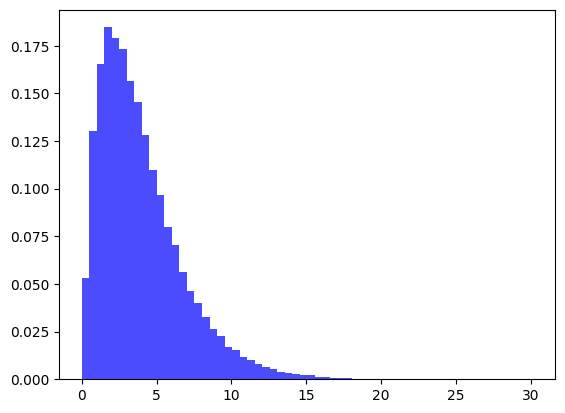

In [19]:
#Distribuição Gama
shape = 2
scale = 2
size = 100000
distribuicao_gama = np.random.gamma(shape, scale, size)

plt.hist(distribuicao_gama,color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.show()

In [20]:
# Criar amostras: 10, 40, 80, 120, contendo 300 valores

amostra_10 = []
amostra_40 = []
amostra_80 = []
amostra_120 = []

np.random.seed(1)
for _ in range(10):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_10.append(sample_tlc)

np.random.seed(2)
for _ in range(40):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_40.append(sample_tlc)

np.random.seed(3)
for _ in range(80):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_80.append(sample_tlc)

np.random.seed(4)
for _ in range(120):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_120.append(sample_tlc)

In [21]:
# Tirando as médias
medias_10 = []
medias_40 = []
medias_80 = []
medias_120 = []

for array in amostra_10:
  medias_10.append(np.mean(array))

for array in amostra_40:
  medias_40.append(np.mean(array))

for array in amostra_80:
  medias_80.append(np.mean(array))

for array in amostra_120:
  medias_120.append(np.mean(array))

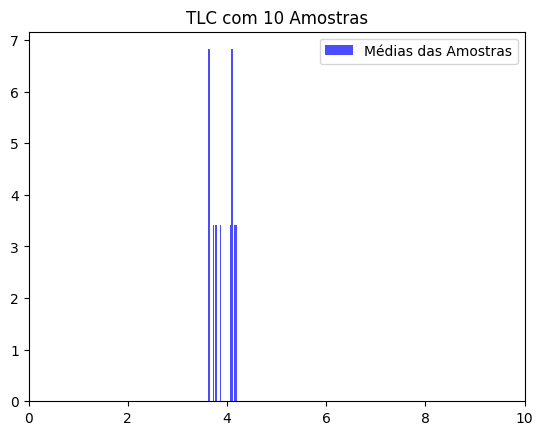

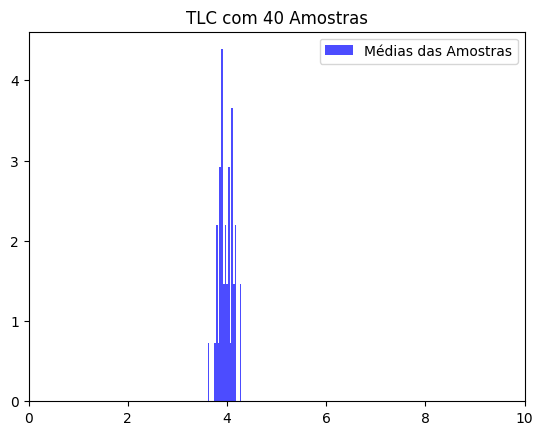

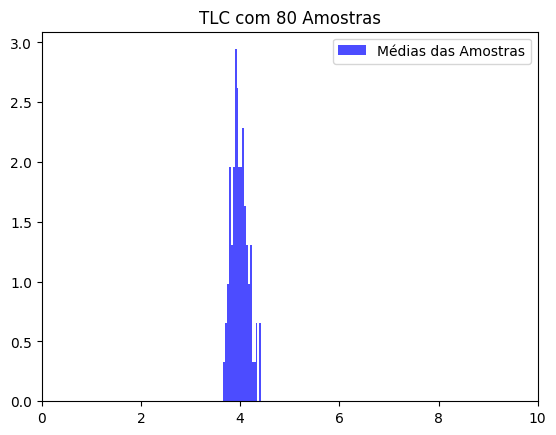

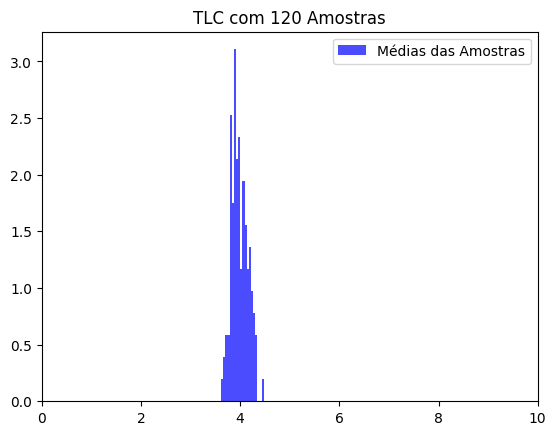

In [22]:
# Plotando Gráficos com TLC
plt.hist(medias_10, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 10 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_40, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 40 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_80, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 80 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_120, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 120 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

### Seção C: p-value
Comando: Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.


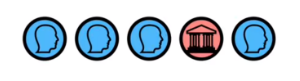

#### Explicação 1: Mais Didática seguindo os três passos fundamentais do p-value.

Nessa primeira abordagem, o cálculo do p-value foi feito de forma mais didática, começando pela definição da hipótese nula, que afirma que o evento observado — obter um determinado padrão ao lançar cinco moedas — é resultado de um processo totalmente aleatório.

Em seguida, listou-se todas as possíveis combinações de resultados das cinco moedas, mostrando explicitamente que existem 32 combinações possíveis, cada um com a mesma chance de ocorrer. A partir disso, calculou-se a probabilidade exata do evento observado, que no caso corresponde a obter quatro caras e uma coroa.

Depois, identificou-se quais outros resultados têm a mesma probabilidade (eventos igualmente raros) e quais têm probabilidade ainda menor (eventos mais raros).

A soma dessas probabilidades forma o p-value, pois representa a chance de observar o evento registrado ou qualquer outro que seja tão raro quanto ou mais raro sob a hipótese de aleatoriedade. Ao somar todas essas probabilidades, chegamos a um p-value maior que 0,05 (0.375), indicando que o resultado observado não está entre os eventos improváveis o suficiente para rejeitar a hipótese nula.

In [23]:
# Passo 1 - Determinar Hipótese e Parâmetros

n = 5 # número de lançamentos
p = 0.5 # probabilidade de sair cara/coroa
co = 4 # 4 coroas

sucesso = 1 # ou seja, sair cara

print('A Hipótese H0 é: o evento é aleatório')

A Hipótese H0 é: o evento é aleatório


In [24]:
# Passo 2 - Listar todas as possibilidades de resultado ao jogar as 5 moedas
import itertools

opcoes = ['C', 'Co']
resultados = list(itertools.product(opcoes, repeat = 5))

print(f'Existem {len(resultados)} possíveis formas de combinação no lançamento das 5 moedas')
print('As possibilidades são:')
for seq in resultados:
    print(seq)

Existem 32 possíveis formas de combinação no lançamento das 5 moedas
As possibilidades são:
('C', 'C', 'C', 'C', 'C')
('C', 'C', 'C', 'C', 'Co')
('C', 'C', 'C', 'Co', 'C')
('C', 'C', 'C', 'Co', 'Co')
('C', 'C', 'Co', 'C', 'C')
('C', 'C', 'Co', 'C', 'Co')
('C', 'C', 'Co', 'Co', 'C')
('C', 'C', 'Co', 'Co', 'Co')
('C', 'Co', 'C', 'C', 'C')
('C', 'Co', 'C', 'C', 'Co')
('C', 'Co', 'C', 'Co', 'C')
('C', 'Co', 'C', 'Co', 'Co')
('C', 'Co', 'Co', 'C', 'C')
('C', 'Co', 'Co', 'C', 'Co')
('C', 'Co', 'Co', 'Co', 'C')
('C', 'Co', 'Co', 'Co', 'Co')
('Co', 'C', 'C', 'C', 'C')
('Co', 'C', 'C', 'C', 'Co')
('Co', 'C', 'C', 'Co', 'C')
('Co', 'C', 'C', 'Co', 'Co')
('Co', 'C', 'Co', 'C', 'C')
('Co', 'C', 'Co', 'C', 'Co')
('Co', 'C', 'Co', 'Co', 'C')
('Co', 'C', 'Co', 'Co', 'Co')
('Co', 'Co', 'C', 'C', 'C')
('Co', 'Co', 'C', 'C', 'Co')
('Co', 'Co', 'C', 'Co', 'C')
('Co', 'Co', 'C', 'Co', 'Co')
('Co', 'Co', 'Co', 'C', 'C')
('Co', 'Co', 'Co', 'C', 'Co')
('Co', 'Co', 'Co', 'Co', 'C')
('Co', 'Co', 'Co', 'Co', 'C

Entende-se: H -> Cara / T -> Coroa

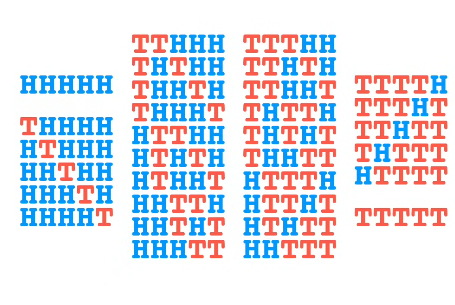

In [25]:
# Passo 3: Calcular a probabilidade de conseguir 4 caras e 1 coroa

combinacao = comb(n, co)
probabilidade_binomial = combinacao * (p ** co) * ((1 - p) ** (n - co))
print(f'Probabilidade de obter 4 caras e 1 coroa = {probabilidade_binomial:.2f}')

Probabilidade de obter 4 caras e 1 coroa = 0.16


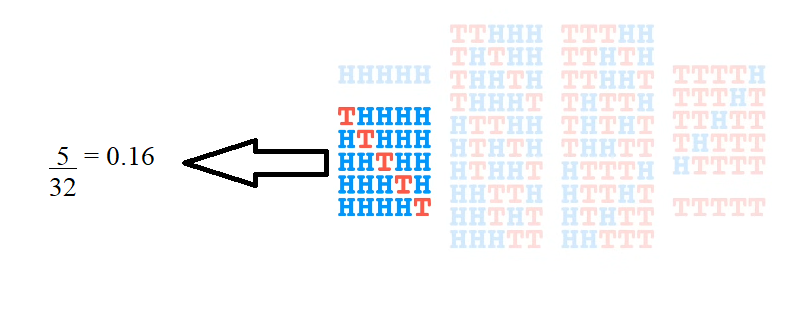

In [26]:
# Passos 4 e 5: Calcular a Probabilidade de algo igualmente raro, ou mais raro ainda

probabilidades_totais = {coroa: comb(n, coroa) * (p**coroa) * ((1 - p)**(n - coroa)) for coroa in range(n+1)}
probabilidades_raros = {coroa: probabilidade for coroa, probabilidade in probabilidades_totais.items() if probabilidade == probabilidades_totais[4]}
probabilidades_mais_raros = {coroa: probabilidade for coroa, probabilidade in probabilidades_totais.items() if probabilidade < probabilidades_totais[4]}

print('Probabilidade de casos tão raros quanto:')
for coroa, probabilidade in probabilidades_raros.items():
  print(f'{coroa} caras = {probabilidade:.2f}')

print('Probabilidade de casos mais raros ainda:')
for coroa, probabilidade in probabilidades_mais_raros.items():
  print(f'{coroa} caras = {probabilidade:.2f}')

# Como já foi coletado a de vir apenas 1 coroa, só resta a de 4 coroass para igualmente raro
# Para mais raro ainda, a chance de não der nenhuma cara e nenhuma coroa

Probabilidade de casos tão raros quanto:
1 caras = 0.16
4 caras = 0.16
Probabilidade de casos mais raros ainda:
0 caras = 0.03
5 caras = 0.03


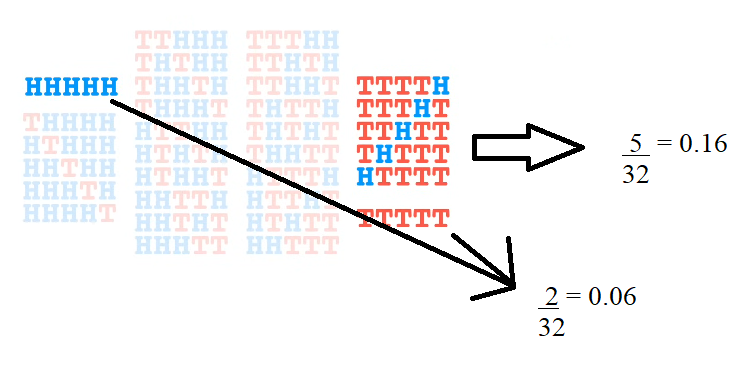

In [27]:
# Passo 6: Somar os três valores obtidos e achar o p-value
valores_totais = [probabilidade_binomial, probabilidades_raros[1], sum(probabilidades_mais_raros.values())]
p_value = sum(valores_totais)

print(f'Logo, não rejeita-se a hipótese nula, pois o p-value é maior que 0.05: {p_value}')

Logo, não rejeita-se a hipótese nula, pois o p-value é maior que 0.05: 0.375


#### Explicação 2: mais técnica, ainda seguindo os três passos fundamentais do p-value

Na segunda abordagem, o cálculo do p-value foi realizado de forma mais técnica, utilizando diretamente a distribuição binomial. Inicialmente, sob a hipótese nula de que o processo é totalmente aleatório, calculou-se a probabilidade de cada possível número de ocorrências do símbolo observado, variando de zero até cinco. Essas probabilidades foram representadas em um gráfico de barras, permitindo visualizar quais resultados são mais ou menos prováveis dentro do modelo teórico.

Em seguida, destacou-se especificamente a probabilidade associada ao resultado observado, que no caso corresponde a apenas uma ocorrência do símbolo diferente (única barra vermelha).

A partir dessa probabilidade observada, identificou-se todos os resultados que possuem probabilidade igual ou menor, pois esses são os resultados considerados “tão raros quanto ou mais raros que o observado” (quatro barras vermelhas no gráfico de regiões do p-value).

Somou-se essas probabilidades para obter o valor final do p-value e destacou-se graficamente a região correspondente no histograma das probabilidades binomiais. Como o p-value encontrado ficou claramente acima do nível de significância convencional de 0.05 (0.375), concluiu-se que o resultado observado é compatível com o comportamento esperado sob a hipótese de aleatoriedade. Assim, também nessa abordagem, não há indícios estatísticos para rejeitar a hipótese nula.

In [28]:
# Passo 1: Determinar Hipótese e Parâmetros
n = 5
p = 0.5
coroa = 1

print('A Hipótese H0 é: o evento é aleatório')

A Hipótese H0 é: o evento é aleatório


A probabilidade de obter 0 caras em 5 lançamentos = 0.03
A probabilidade de obter 1 caras em 5 lançamentos = 0.16
A probabilidade de obter 2 caras em 5 lançamentos = 0.31
A probabilidade de obter 3 caras em 5 lançamentos = 0.31
A probabilidade de obter 4 caras em 5 lançamentos = 0.16
A probabilidade de obter 5 caras em 5 lançamentos = 0.03


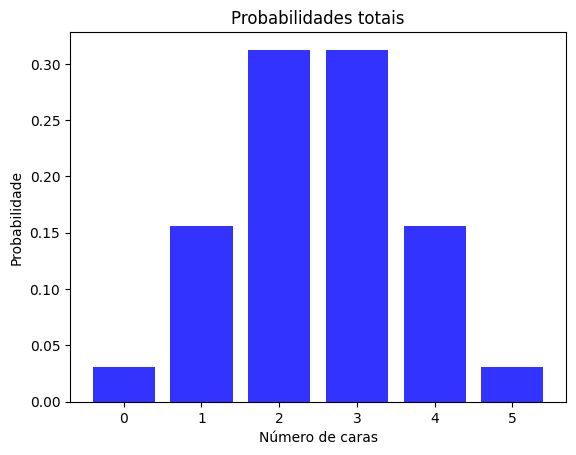

In [29]:
from scipy.stats import binom

# Passo 2: Calcular a probabilidade de cada resultado
x = np.arange(n + 1)
probabilidades_totais = binom.pmf(x, n, p)

for i, prob in enumerate(probabilidades_totais):
    print(f'A probabilidade de obter {i} caras em {n} lançamentos = {prob:.2f}')

plt.bar(x, probabilidades_totais, color = 'blue', alpha = 0.8)
plt.title('Probabilidades totais')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.show()

A probabilidade do resultado observado, ou seja, 1 coroa é de 0.16


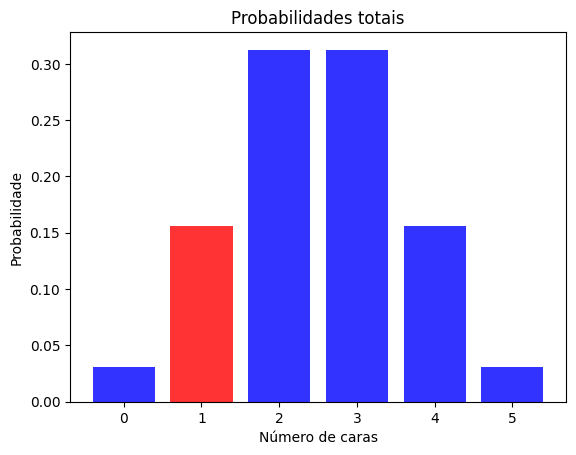

In [30]:
# Parte 3: Calcular a probabilidade do resultado observado (coroa = 1)
probabilidade_observada = probabilidades_totais[coroa]
print(f'A probabilidade do resultado observado, ou seja, 1 coroa é de {probabilidade_observada:.2f}')

colors = ['blue'] * len(probabilidades_totais)
colors[1] = 'red'

plt.bar(x, probabilidades_totais, color = colors, alpha = 0.8)
plt.title('Probabilidades totais')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.show()

Resultados que contribuem para o p-value: [np.int64(0), np.int64(1), np.int64(4), np.int64(5)]
O p-value é de 0.375


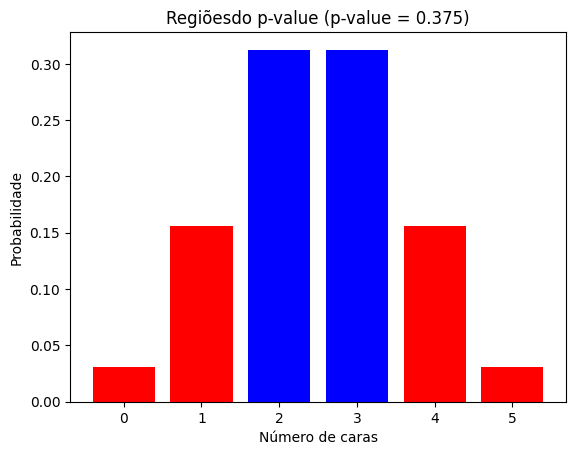

In [31]:
# Partes 4 e 5: Calcular probabilidade de eventos igualmente ou mais raros
resultados_p_value = []
p_value = 0

for coroa in x:
  probabilidade_coroa = probabilidades_totais[coroa]

  if probabilidade_coroa <= probabilidade_observada or np.isclose(probabilidade_coroa, probabilidade_observada):
    p_value += probabilidade_coroa
    resultados_p_value.append(coroa)

print(f'Resultados que contribuem para o p-value: {resultados_p_value}')
print(f'O p-value é de {p_value:.3f}')

cores = ['blue'] * (n + 1)
for coroa in resultados_p_value:
  cores[coroa] = 'red'

plt.bar(x,probabilidades_totais, color = cores)
plt.title(f'Regiões do p-value (p-value = {p_value:.3f})')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.show()

### Seção D: p-value

A fim de encontrar a taxa de falsos negativos, foram geradas duas Gaussianas: a hipótese Nula (H0) em vermelho (com média = 0) e a Hipótese Alternativa (H1) em azul (com média = 4), e ambas com o mesmo desvio padrão de 1.

A partir da distribuição azul sorteou-se 100 sequências independentes, cada uma contendo 3 valores, e calculou-se a média de cada sequência. Para cada média calculou-se o p-value do teste z assumindo H0 (ou seja, a probabilidade, sob H0, de observar uma média tão extrema ou mais extrema do que a obtida). O histograma dos p-values mostra a distribuição dessas probabilidades; a linha vertical em 0,05 marca o limiar usual de significância.

A taxa de falsos negativos é simplesmente a fração das 100 sequências cujo p-value ficou maior que 0,05, isto é, casos em que a amostra veio de H₁ (a situação alternativa verdadeira) mas o teste não detectou essa diferença e, portanto, não rejeitou H0. Importante salientar que não houve falsos negativos, pois todas as amostras vindas da distribuição alternativa (H1) caíram em regiões que o teste considera suficientemente diferentes da hipótese nula (H0), impactados pela diferença entre as médias ser grande e um desvio padrão relativamente pequeno também.

Ou seja, quanto maior for a taxa de falsos negativos, menor é o poder de detectar a diferença real entre H₀ e H1. Mesmo quando as médias das duas distribuições são bastante separadas, amostras muito pequenas (n = 3 por sequência) podem apresentar variabilidade suficiente para que algumas médias caiam em regiões compatíveis com H0, gerando p-values altos e, consequentemente, falsos negativos.

Pode-se dizer que essa análise permite estimar a probabilidade de falhar em detectar uma diferença real nas condições especificadas.

Comando:

* Crie duas Gaussianas como mostrado abaixo (é só variar a média).

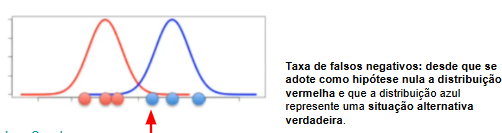

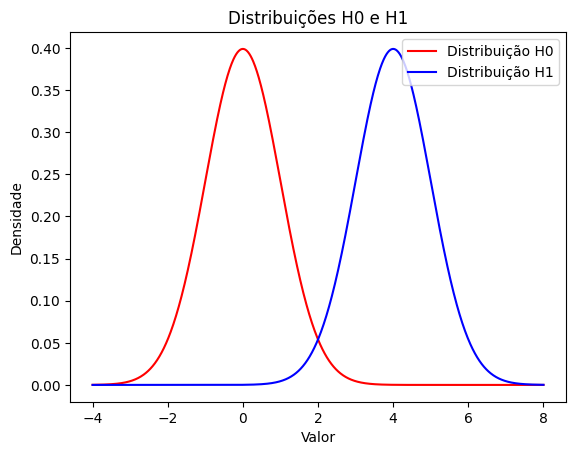

In [32]:
# Criando duas Gaussianas
media_vermelha = 0
media_azul = 4
desvio_padrao = 1

x_min = min(media_vermelha, media_azul) - 4 * desvio_padrao
x_max = max(media_vermelha, media_azul) + 4 * desvio_padrao
x = np.linspace(x_min, x_max, 1000)

y_vermelho = norm.pdf(x, media_vermelha, desvio_padrao)
y_azul = norm.pdf(x, media_azul, desvio_padrao)

plt.plot(x, y_vermelho, color = 'red', label = 'Distribuição H0')
plt.plot(x, y_azul, color = 'blue', label = 'Distribuição H1')
plt.xlabel('Valor')
plt.legend()
plt.ylabel('Densidade')
plt.title('Distribuições H0 e H1')
plt.show()

* Comando: Sorteie 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value.

/tmp/ipython-input-1573190556.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


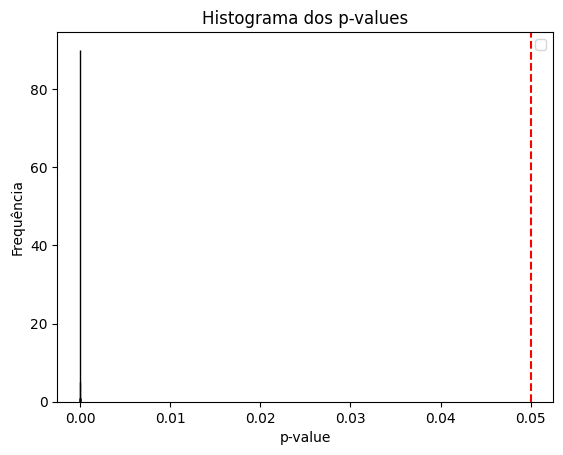

In [33]:
# Sortear 100 sequências de 3 valores na azul
np.random.seed(77)
samples = np.random.normal(loc = media_azul, scale = desvio_padrao, size = (100, 3))
samples_media = np.mean(samples, axis = 1)

# Calcular z-score comparando com H0
z_scores = (samples_media - media_vermelha) / (desvio_padrao / np.sqrt(3))

# Calcular p-value
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))
p_values[0]

plt.hist(p_values, bins = 20, edgecolor = 'black')
plt.axvline(0.05, color='red', linestyle='--')
plt.xlabel('p-value')
plt.ylabel('Frequência')
plt.title('Histograma dos p-values')
plt.legend()
plt.show()

* Comando: Calcule a taxa de falso negativos (p-value acima de 5%).

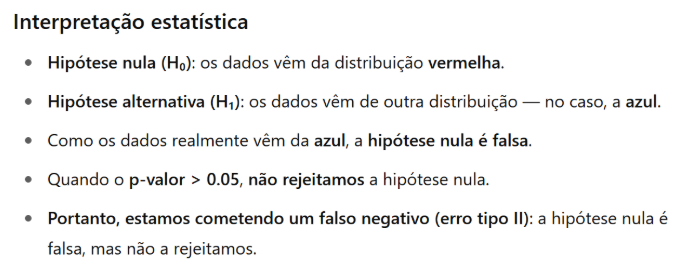

In [34]:
# Calcular taxa de falso negativo (p-value > 0.05)
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / len(p_values)

print(f'Falsos Negativos: {falsos_negativos} de {len(p_values)}')
print(f'Taxa de Falsos Negativos: {taxa_falsos_negativos * 100:.2f}%')

Falsos Negativos: 0 de 100
Taxa de Falsos Negativos: 0.00%
